### Data Preperation
Split the training dataset (training.csv) into training and testing datasets. 240 pyrite analyses from each label (sedimentary (0), synsedimentary hydrothermal (1), and post-sedimentary hydrothermal(2)) are randomly selected to form a balanced training dataset. The rest analyses form the testing dataset. Another individual dataset (Blind_Test.csv) is used for blind testing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb

#make sure matplotlib is exporting editable text
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
#read data as dataframes
fp1 = '/Users/junyaokang/Desktop/TE/ML_Pyrite/data/Training.csv'
fp2 = '/Users/junyaokang/Desktop/TE/ML_Pyrite/data/Blind_Test.csv'
fp3 = '/Users/junyaokang/Desktop/TE/ML_Pyrite/data/Xiao_Cui.csv'
Data = pd.read_csv(fp1)
Blind_Test = pd.read_csv(fp2)
XC = pd.read_csv(fp3)

In [3]:
#split the 'sedimentary' data into train set and test set
#get the Sedimentary data
Sedimentary_data = Data[Data['Deposit style']=='Sedimentary'].copy()

#get the deposit names
Sedimentary_deposit = np.unique(Sedimentary_data['Deposit'])

#Create two empty dataframe to store train and test data
Test_data = pd.DataFrame()
Train_data = pd.DataFrame()

#For each deposit, randomly select 15 data as train data
for i in Sedimentary_deposit:
    Train, Test = train_test_split(Data[Data['Deposit']==i], train_size=15, random_state=0)
    Train_data = pd.concat([Train_data, Train])
    Test_data = pd.concat([Test_data, Test])

In [4]:
#split the hydrothemal breccia data into train set and test set
Train, Test = train_test_split(Data[Data['Deposit']=='hydrothermal breccia Menninnie Dam'], train_size=30, random_state=0)
Train_data = pd.concat([Train_data, Train])
Test_data = pd.concat([Test_data, Test])

Train, Test = train_test_split(Data[Data['Deposit']=='hydrothermal breccia Telephone Dam'], train_size=30, random_state=0)
Train_data = pd.concat([Train_data, Train])
Test_data = pd.concat([Test_data, Test])

In [5]:
#split the IOCG data into train set and test set
Train, Test = train_test_split(Data[Data['Deposit']=='IOCG Manxman'], train_size=30, random_state=0)
Train_data = pd.concat([Train_data, Train])
Test_data = pd.concat([Test_data, Test])

Train, Test = train_test_split(Data[Data['Deposit']=='IOCG Punt Hill'], train_size=30, random_state=0)
Train_data = pd.concat([Train_data, Train])
Test_data = pd.concat([Test_data, Test])

In [6]:
#split the 'Orogenic Au' data into train set and test set
#get the Orogenic Au data
Au_data = Data[Data['Deposit style']=='Orogenic Au'].copy()

#get the deposit names
Au_deposit = np.unique(Au_data['Deposit'])

#For each deposit, randomly select 4 data as train data
for i in Au_deposit:
    Train, Test = train_test_split(Data[Data['Deposit']==i], train_size=4, random_state=0)
    Train_data = pd.concat([Train_data, Train])
    Test_data = pd.concat([Test_data, Test])

In [7]:
#split the porphyry data into train set and test set
Train, Test = train_test_split(Data[Data['Deposit']=='porphyry Chalkidiki'], train_size=30, random_state=0)
Train_data = pd.concat([Train_data, Train])
Test_data = pd.concat([Test_data, Test])

Train, Test = train_test_split(Data[Data['Deposit']=='porphyry Cadia'], train_size=30, random_state=0)
Train_data = pd.concat([Train_data, Train])
Test_data = pd.concat([Test_data, Test])

In [8]:
#split the 'SEDEX' data into train set and test set
#get the SEDEX data
SEDEX_data = Data[Data['Deposit style']=='SEDEX'].copy()

#get the deposit names
SEDEX_deposit = np.unique(SEDEX_data['Deposit'])

#For each deposit, randomly select 24 data as train data
for i in SEDEX_deposit:
    Train, Test = train_test_split(Data[Data['Deposit']==i], train_size=24, random_state=0)
    Train_data = pd.concat([Train_data, Train])
    Test_data = pd.concat([Test_data, Test])

In [9]:
#split the VHMS data into train set and test set
Train, Test = train_test_split(Data[Data['Deposit']=='VHMS Kutlular'], train_size=15, random_state=0)
Train_data = pd.concat([Train_data, Train])
Test_data = pd.concat([Test_data, Test])

Train, Test = train_test_split(Data[Data['Deposit']=='VHMS Yaman-Kasypyrite'], train_size=46, random_state=0)
Train_data = pd.concat([Train_data, Train])
Test_data = pd.concat([Test_data, Test], ignore_index=True)

Train_data = pd.concat([Train_data, Data[Data['Deposit']=='VHMS Golden Grove']])
Train_data = pd.concat([Train_data, Data[Data['Deposit']=='VHMS Jaguar Mine']])
Train_data = pd.concat([Train_data, Data[Data['Deposit']=='VHMS Kyzilkaya']])
Train_data = pd.concat([Train_data, Data[Data['Deposit']=='VHMS Lahanos']])
Train_data = pd.concat([Train_data, Data[Data['Deposit']=='VHMS Scuddles']], ignore_index=True)


In [10]:
#get data and labels
X_train = Train_data.iloc[:, 3:].copy()
y_train = Train_data.iloc[:, 2].copy()
X_test = Test_data.iloc[:, 3:].copy()
y_test = Test_data.iloc[:, 2].copy()
X_blind_test = Blind_Test.iloc[:, 3:].copy()
y_blind_test = Blind_Test.iloc[:, 2].copy()
XC_data = XC.iloc[:, 2:].copy()

#store the feature names
feature_names = list(X_train.columns)

In [11]:
#standardize the data
scaler = StandardScaler()
#use X_train to compute the mean and std as the scaler
scaler.fit(X_train)

#standardize all the data, and then add column names to features
X_train = pd.DataFrame(scaler.transform(X_train), columns = feature_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns = feature_names)
X_blind_test = pd.DataFrame(scaler.transform(X_blind_test), columns = feature_names)
XC_data = pd.DataFrame(scaler.transform(XC_data), columns = feature_names)

### Random Forest

In [ ]:
#find the best parameters
params = {'n_estimators': list(range(100,1100,100)),
         'min_samples_leaf': list(range(1,10,1)),
         'criterion': ['gini','entropy']}

gs_rf = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid = params, scoring = 'f1_macro')

gs_rf.fit(X_train, y_train)

gs_rf.best_params_

In [12]:
#train the random forest
clf = RandomForestClassifier(criterion = 'gini', n_estimators = 300, min_samples_leaf = 2, oob_score = True, random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=300, oob_score=True,
                       random_state=0)

In [13]:
#Using the classifier to predict the test dataset
y_pred = clf.predict(X_test)

In [14]:
#classification report for the test dataset
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       688
           1       0.92      0.92      0.92       993
           2       0.90      0.87      0.89       806

    accuracy                           0.91      2487
   macro avg       0.91      0.91      0.91      2487
weighted avg       0.91      0.91      0.91      2487



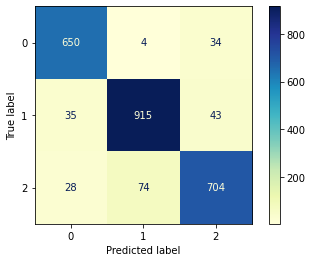

In [15]:
#confusion matrix for the test dataset
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='YlGnBu')
plt.savefig("ConfusionMatrix_RD_Test.pdf", dpi=150)

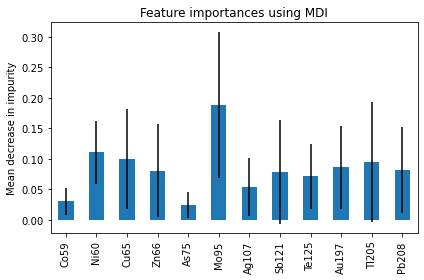

In [16]:
#calculate the importances (mean decrease in impurity) of different features and the satndard deviation
importances = clf.feature_importances_

#calculate the satndard deviation
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

clf_importances = pd.Series(importances, index = clf.feature_names_in_)

fig, ax = plt.subplots()
clf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig("Feature_Importance_RD.pdf", dpi=150)

In [17]:
#Using the classifier to predict the blind test dataset
y_blind_pred = clf.predict(X_blind_test)

In [18]:
#classification report for the blind test dataset
print(classification_report(y_blind_test, y_blind_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       195
           1       0.91      0.88      0.89       112
           2       0.89      0.95      0.92       118

    accuracy                           0.93       425
   macro avg       0.92      0.92      0.92       425
weighted avg       0.93      0.93      0.93       425



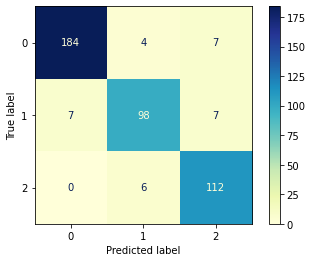

In [19]:
#confusion matrix for the blind test dataset
cm_blind = confusion_matrix(y_blind_test, y_blind_pred)
cm_blind_display = ConfusionMatrixDisplay(cm_blind).plot(cmap='YlGnBu')
plt.savefig("ConfusionMatrix_RD_Blind_Test.pdf", dpi=150)

In [20]:
#Using the classifier to predict the Xiao and Cui data
y_XC_RD_pred = clf.predict(XC_data)

#make a copy of the Xiao and Cui data
XC_RD = XC.copy()

#add labels as a new column in the XC_RD
XC_RD['Label'] = y_XC_RD_pred

#Make probs as a three-column dataframe
XC_RD_prob = pd.DataFrame(clf.predict_proba(XC_data), columns = ['0', '1', '2'])

#Combine the XC_RD dataframe and the prob dataframe
XC_RD = pd.concat([XC_RD, XC_RD_prob], axis=1)

XC_RD.to_csv("XC_RD.csv")

### XGBoost

In [21]:
#change X_train to a DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)

In [ ]:
#set the initial parameters and check the optimum number of trees
params = {'eta': 0.1,
'max_depth': 5,
'min_child_weight': 1,
'subsample': 0.8,
'colsample_bytree': 0.8,
'objective': 'multi:softprob',
'num_class': 3
}
xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=100, metrics='auc', seed=0)

In [ ]:
#Tune max_depth and min_child_weight
param_test1 = {
 'max_depth': range(3,10,2),
 'min_child_weight': range(1,6,2)
}
gsearcg1 = GridSearchCV(xgb.XGBClassifier(learning_rate =0.1, n_estimators=492, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, seed=0), param_grid = param_test1, scoring='f1_macro')
gsearcg1.fit(X_train, y_train)
gsearcg1.best_params_, gsearcg1.best_score_

In [ ]:
#Fine tuning max_depth and min_child_weight
param_test2 = {
 'max_depth': [1,2,3,4],
 'min_child_weight': [0.5,1,1.5]
}
gsearcg2 = GridSearchCV(xgb.XGBClassifier(learning_rate =0.1, n_estimators=492, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, seed=0), param_grid = param_test2, scoring='f1_macro')
gsearcg2.fit(X_train, y_train)
gsearcg2.best_params_, gsearcg2.best_score_

In [ ]:
#Tune gamma
param_test3 = {
 'gamma': np.arange(0,0.5,0.1)
}
gsearcg3 = GridSearchCV(xgb.XGBClassifier(learning_rate =0.1, n_estimators=492, max_depth=2,
 min_child_weight=0.5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, seed=0), param_grid = param_test3, scoring='f1_macro')
gsearcg3.fit(X_train, y_train)
gsearcg3.best_params_, gsearcg3.best_score_

In [ ]:
#Recalibrate the number of boosting rounds
params = {'eta': 0.1,
'max_depth': 2,
'min_child_weight': 0.5,
'gamma': 0.3,
'subsample': 0.8,
'colsample_bytree': 0.8,
'objective': 'multi:softprob',
'num_class': 3
}
xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=100, metrics='auc', seed=0)

In [ ]:
#Tune subsample and colsample_bytree
param_test4 = {
 'subsample': np.arange(0.5,1,0.05),
 'colsample_bytree': np.arange(0.5,1,0.05)
}
gsearcg4 = GridSearchCV(xgb.XGBClassifier(learning_rate =0.1, n_estimators=261, max_depth=2,
 min_child_weight=0.5, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, seed=0), param_grid = param_test4, scoring='f1_macro')
gsearcg4.fit(X_train, y_train)
gsearcg4.best_params_, gsearcg4.best_score_

In [22]:
#choose learning_rate =0.1, n_estimators=300
clf = xgb.XGBClassifier(learning_rate =0.1, n_estimators=300, max_depth=2,
 min_child_weight=0.5, gamma=0.3, subsample=0.65, colsample_bytree=0.5,
 objective= 'multi:softprob', num_class=3, seed=0, importance_type = 'gain')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       688
           1       0.95      0.94      0.94       993
           2       0.93      0.90      0.91       806

    accuracy                           0.93      2487
   macro avg       0.93      0.93      0.93      2487
weighted avg       0.93      0.93      0.93      2487



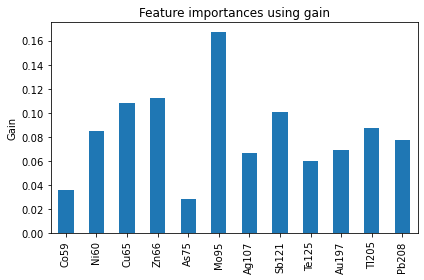

In [23]:
#calculate the importances (gain) of different features
importances = clf.feature_importances_

clf_importances = pd.Series(importances, index = clf.feature_names_in_)

fig, ax = plt.subplots()
clf_importances.plot.bar()
ax.set_title("Feature importances using gain")
ax.set_ylabel("Gain")
fig.tight_layout()
plt.savefig("Feature_Importance_XG.pdf", dpi=150)

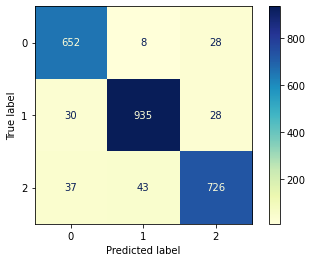

In [24]:
#confusion matrix for the test dataset
cm_blind = confusion_matrix(y_test, y_pred)
cm_blind_display = ConfusionMatrixDisplay(cm_blind).plot(cmap='YlGnBu')
plt.savefig("ConfusionMatrix_XG_Test.pdf", dpi=150)

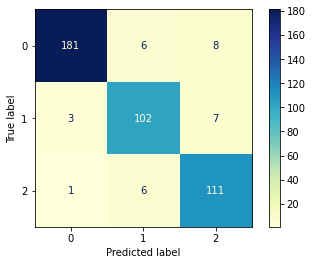

In [25]:
#Using the classifier to predict the blind test dataset
y_blind_pred = clf.predict(X_blind_test)
#confusion matrix for the blind test dataset
cm_blind = confusion_matrix(y_blind_test, y_blind_pred)
cm_blind_display = ConfusionMatrixDisplay(cm_blind).plot(cmap='YlGnBu')
plt.savefig("ConfusionMatrix_XG_Blind_Test.pdf", dpi=150)

In [26]:
print(classification_report(y_blind_test, y_blind_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       195
           1       0.89      0.91      0.90       112
           2       0.88      0.94      0.91       118

    accuracy                           0.93       425
   macro avg       0.92      0.93      0.92       425
weighted avg       0.93      0.93      0.93       425



In [27]:
#Using the classifier to predict the Xiao and Cui data
y_XC_XG_pred = clf.predict(XC_data)

#make a copy of the Xiao and Cui data
XC_XG = XC.copy()

#add labels as a new column in the XC_XG
XC_XG['Label'] = y_XC_XG_pred

#Make probs as a three-column dataframe
XC_XG_prob = pd.DataFrame(clf.predict_proba(XC_data), columns = ['0', '1', '2'])

#Combine the XC_RD dataframe and the prob dataframe
XC_XG = pd.concat([XC_XG, XC_XG_prob], axis=1)

XC_XG.to_csv("XC_XG.csv")